# The Normal Probability Model

In [6]:
# Import IRdisplay to insert images 
library("IRdisplay")

## 1.1 Overview

#### 1.1.1 Normal Random Variable
- A continuous random variable whose probability distribution defines a standard bell-shaped curve
- Defined by parameters μ and σ^2^ 
    - Mean locates the center
    - Variance controls the spread 
    - Variance is used rather than SD like discrete variables, to represent this difference the variance is usually written like '5^2^' rather than '25'

#### 1.1.2 Standard Normal Distribution

$μ = 0;  σ^2 = 1$
- Probabilities are areas under the curve 
- Probability of a single point is considered to be zero since continuous is only concerned with intervals
    - Therefore $0 < X < 1$  is the same as $0 \leq X \leq 1$

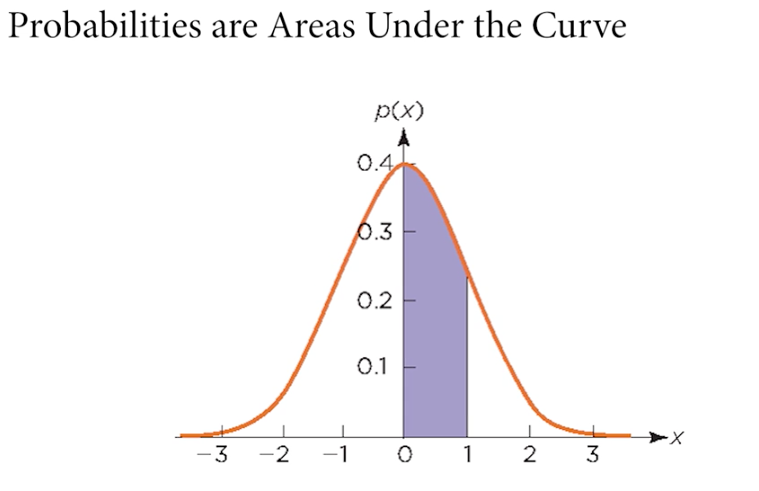

In [25]:
display_png(file="Images/06_Area_under_curve.png")

- Normal distributions with different μ's
    - Shift the same distribution along x-axis by the amount change of µ
- Normal distribution with different variances
    - "Spread" of the curve changes

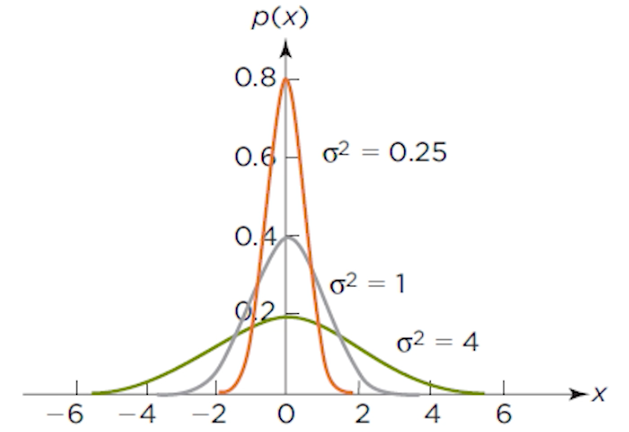

In [26]:
display_png(file="Images/06_different_variances.png")

## 2. Z-Score and Standardization

### 2.1 Z-score

- The number of standard deviations a data value is from the mean
- $Z = \frac{X-\overline{X}}{S}$

Finding Z-score with scale:

In [27]:
gpa = c(3.2, 3.1, 2.8, 3.9, 3.2)
salary = c(90000, 80000, 75000, 92000, 145000)

# Scale displays Z-scores of each item
scale(gpa)
scale(salary)

-0.09907548
-0.34676418
-1.08983029
1.63474544
-0.09907548


-0.2280919
-0.5844855
-0.7626823
-0.1568132
1.7320728


### 2.2 Standardization

- Used to find normal probabilities
- Usually not needed due to lookup tables or software
- Start by converting X into a z-score

#### 2.2.1 Example: Standardizing

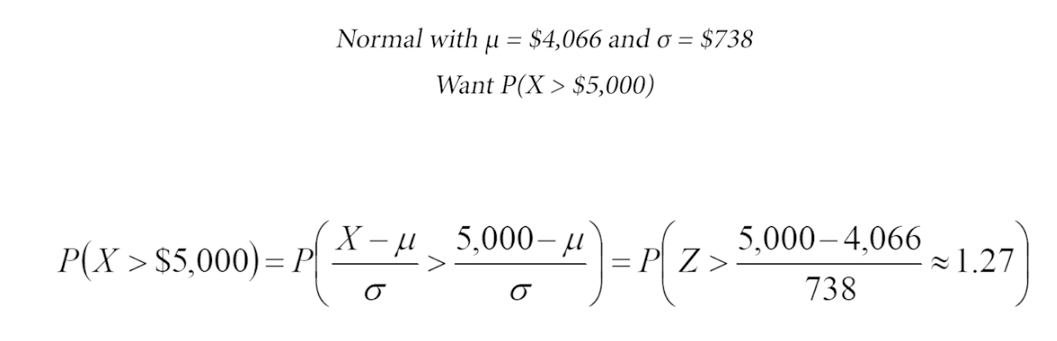

In [29]:
display_png(file="Images/06_Standardizing_Example.png")

Finding probability of Normal Random Variable with **pnorm**
- pnorm is a cumulative value that gives probability up to a point (x < point)
- In this example we want past the point (greater than 5000) so we use 1-pnorm

In [30]:
# P(X>5000)
mean = 4000
sigma = 738

# Use pnorm for continuous
1 - pnorm(5000, mean, sigma)

# You can also convert to z-score first
z = (5000 - mean)/sigma
1 - pnorm(z)

[1] 0.08770662

[1] 0.08770662

### 2.3 Empirical Rule

Here is a visual representation of the Empirical Rule:

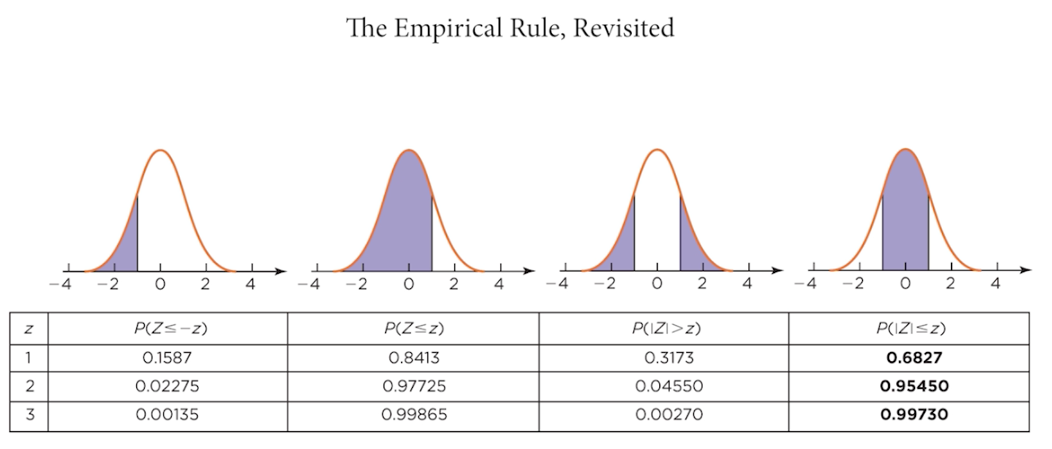

In [31]:
display_png(file="Images/06_Empirical_Rule.png")

## 3. Normal Distribution Applications

### 3.1 Quantile of the Standard Normal Distribution
- The $P^{th}$ quantile of the normal probability distribution is the value of x such that $P(X \leq x)$ = p

#### 3.1.1 Example: Solving for Mean

*A packaging system fills boxes such that weights are normally distributed with a μ = 16.3oz and σ = 0.2oz. The package label state the weight as 16oz.*

*To what weight should the mean of the process be adjusted so that the chance of an underweight box is only 0.005?*

- We know it is underweight if X < 16
- This is a normal distribution with σ = 0.2
- We are looking for a new mean at which P(X < 16) = 0.005

- X can be converted to a Z-score
    - P(Z < z) = 0.005
    - Mean of Z-score is always 0 and sigma is always 1

Calculate z:

In [5]:
z = qnorm(0.005, 0, 1)
z

[1] -2.575829

z-score formula review: $z = \frac{x - µ}{σ}$

- Using some algebra this means µ = x + σ(z)

Plug in values:

In [4]:
mu = 16 -.2*z
mu

[1] 16.51517

### 3.1.2 Example

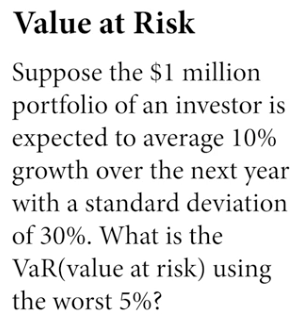

In [8]:
display_png(file="Images/06_Investor_Example.png")  

Known:
- μ = 10
- σ = 30
Looking for:
- Area under the curve of first .005

In [9]:
mean = 10
sigma = 30
qnorm(0.05, mean, sigma)

[1] -39.34561

The worst outcome in the first 5% is -39%

### 3.2 Testing for Normality

#### 3.2.1 Normal Quantile Plots

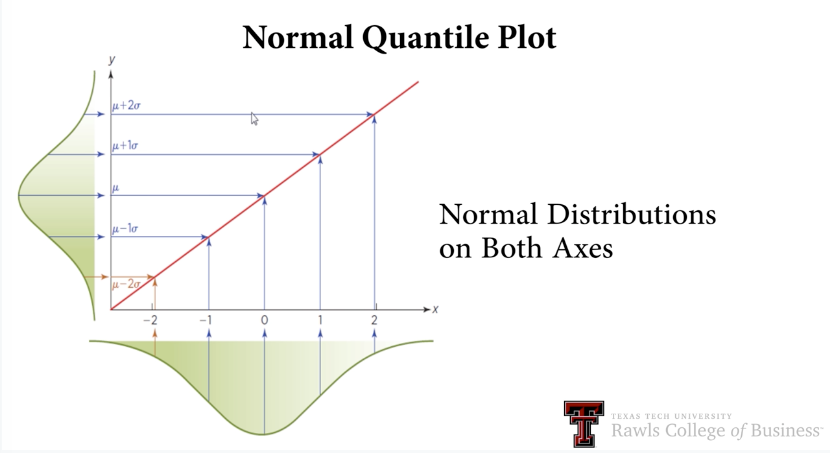

In [13]:
display_png(file="Images/06_Normal_Quantile.png")

To create in R, use **qqnorm**:

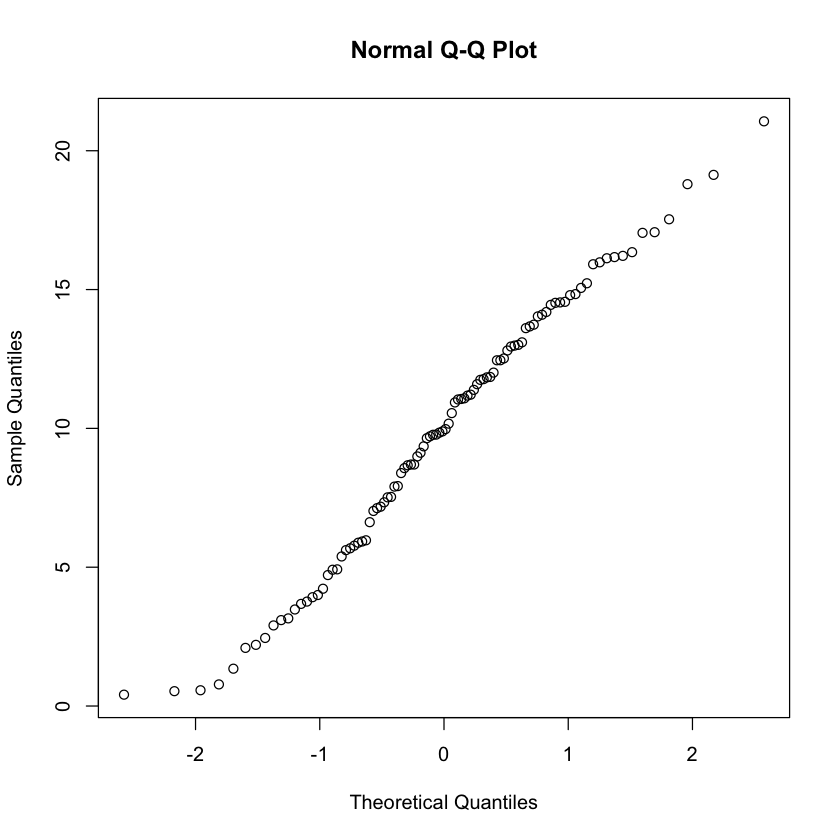

In [15]:
n = 100
x1 = rnorm(n, 10, 5)

qqnorm(x1)

x1 is normally distributed and tracks close to the theoretical quantiles.

Now let's create a non-normal distribution:

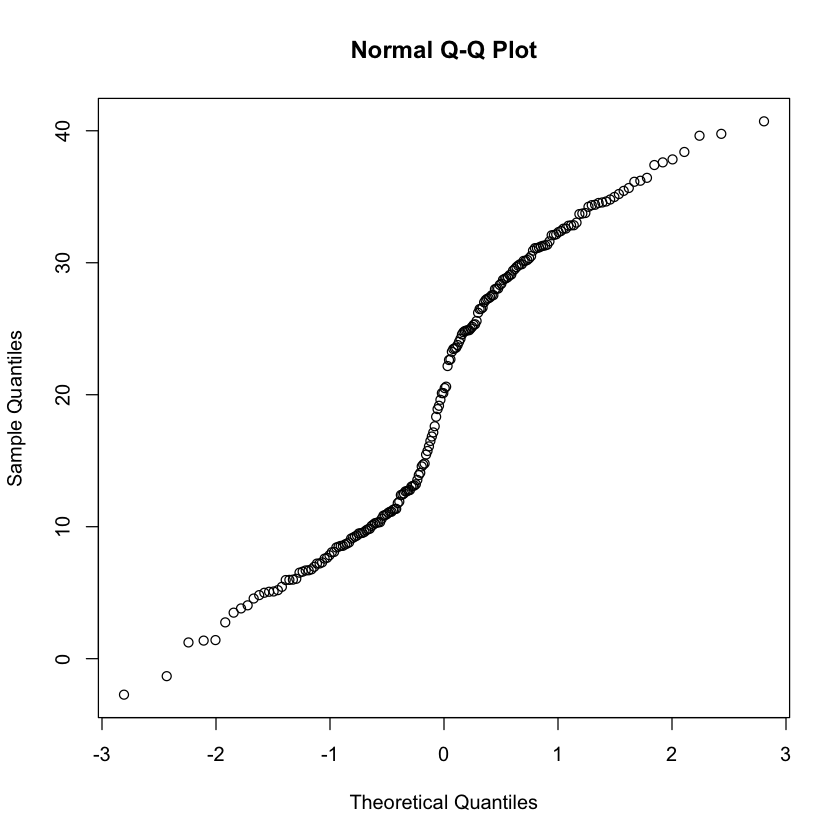

In [18]:
n = 100
x1 = rnorm(n, 10, 5)
x2 = rnorm(n, 30, 5)

# Create new dataset y with known difference in means
y = c(x1, x2)

qqnorm(y)

y is non-linear on the normal quantile plot, it deviates from normality.

#### 3.2.2 Skewness

- **Skewness** measures lack of symmetry
- $K_3$ for normal data

$K_3 = \frac{z^3_1 + z^3_2 + ...z^3_n}{n}$

- When skewness is $\geq$ +2 or $\leq$ -2 then the distribution is markedly different from a normal distribution in its asymmetry

Testing for skewness in an exponential distribution:

[1] 1.712305

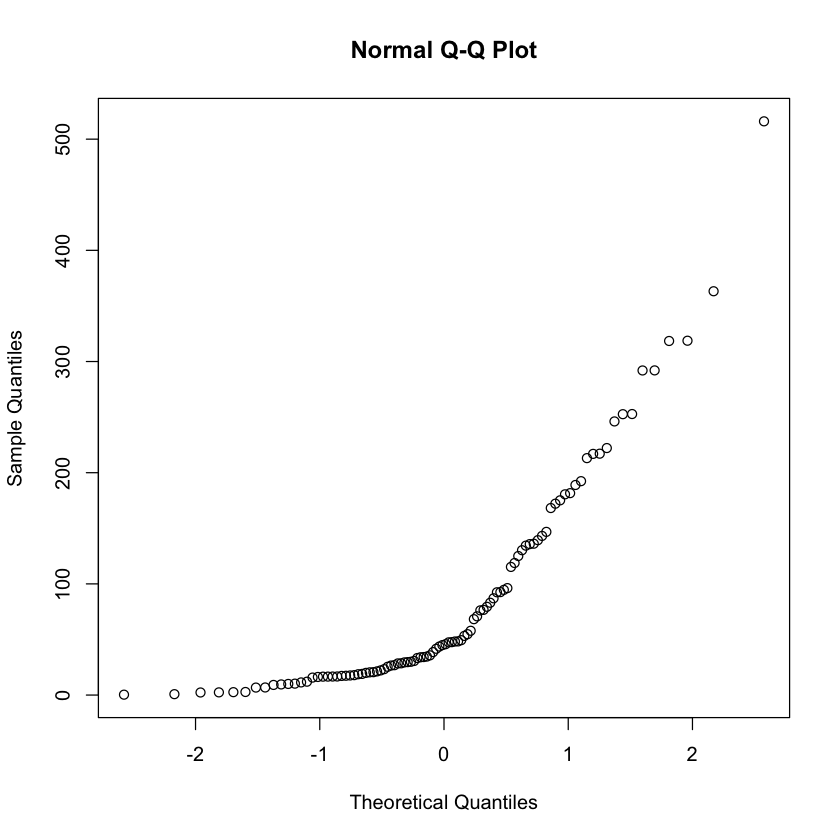

In [23]:
t = rexp(n, .01)
qqnorm(t)

# For this we need e1071 package
# Ensure package is installed in environment

library(e1071)

skewness(t)

#### 3.2.3 Kurtosis

- **Kurtosis** measures the prevalence of outliers
- $K_4$ = 0 for normal data

$K_4 = \frac{z^4_1 + z^4_2 + ...z^4_n}{n} - 3$

- If Kurtosis is $\geq$ 3 then the distribution is markedly different from a normal distiribution in its propensity to produce outliers

Kurtosis is also available in the same package (e1071) above, we can find it the same way on 't':

In [24]:
kurtosis(t)

[1] 3.205867